# 一、标准化导入

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# 二、数据准备

## 1.均衡二分类样本

In [3]:
from sklearn.datasets import make_gaussian_quantiles

In [4]:
X1, y1 = make_gaussian_quantiles(cov=2.0,n_samples=500, n_features=2,n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,n_samples=400, n_features=2, n_classes=2, random_state=1)

In [5]:
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

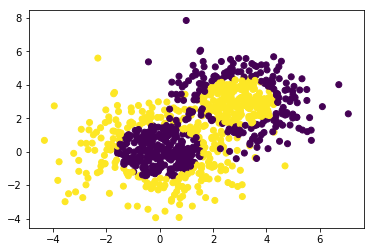

In [6]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

In [7]:
from sklearn.model_selection import train_test_split

In [12]:
Xtrain0, Xtest0, ytrain0, ytest0 = train_test_split(X, y, random_state=42)

## 2.非均衡二分类样本

In [2]:
train = pd.read_csv('train_modified.csv')
train.head()

,Disbursed,Existing_EMI,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,Age,EMI_Loan_Submitted_Missing,...,Var2_2,Var2_3,Var2_4,Var2_5,Var2_6,Mobile_Verified_0,Mobile_Verified_1,Source_0,Source_1,Source_2
0,0,0.0,ID000002C20,300000,5,20000,1,0,37,1,...,0,0,0,0,1,1,0,1,0,0
1,0,0.0,ID000004E40,200000,2,35000,3,13,30,0,...,0,0,0,0,1,0,1,1,0,0
2,0,0.0,ID000007H20,600000,4,22500,1,0,34,1,...,0,0,0,0,0,0,1,0,0,1
3,0,0.0,ID000008I30,1000000,5,35000,3,10,28,1,...,0,0,0,0,0,0,1,0,0,1
4,0,25000.0,ID000009J40,500000,2,100000,3,17,31,1,...,0,0,0,0,0,0,1,0,0,1


In [3]:
target = 'Disbursed' 
IDcol = 'ID'
train['Disbursed'].value_counts() 

0    19680
1      320
Name: Disbursed, dtype: int64

In [4]:
19680 / 20000

0.984

In [5]:
x_columns = [x for x in train.columns if x not in [target, IDcol]]
X = train[x_columns]
y = train['Disbursed']

In [10]:
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X, y, random_state=42)

In [14]:
Xtrain1.head()

,Existing_EMI,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,...,Var2_2,Var2_3,Var2_4,Var2_5,Var2_6,Mobile_Verified_0,Mobile_Verified_1,Source_0,Source_1,Source_2
5514,0.0,100000,5,20000,4,3,23,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1266,0.0,1000000,5,53000,3,14,41,1,1,0,...,0,0,0,0,0,0,1,0,0,1
5864,0.0,200000,2,17900,1,0,24,1,1,1,...,0,0,0,0,0,1,0,0,1,0
15865,0.0,0,0,15000,1,0,24,1,1,1,...,1,0,0,0,0,1,0,0,1,0
12892,0.0,0,0,30000,5,4,25,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [16]:
ytrain1.head()

5514     0
1266     0
5864     0
15865    0
12892    0
Name: Disbursed, dtype: int64

## 3.多分类问题数据

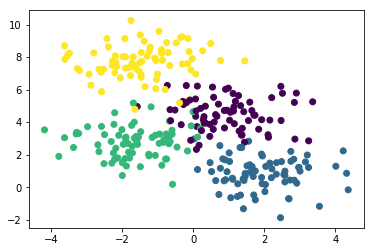

In [18]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [19]:
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X, y, random_state=42)

# 三、建模过程

## 1.非均衡二分类样本建模过程

### 1.1 无效模型

In [17]:
# 导入模型类
from sklearn.ensemble import RandomForestClassifier

In [19]:
# 模式实例
rf0 = RandomForestClassifier(n_estimators=100, random_state=0)

In [20]:
# 训练模型
rf0.fit(Xtrain1, ytrain1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [21]:
# 模型评估类的导入
from sklearn.metrics import accuracy_score

In [22]:
# 训练集准确率计算
accuracy_score(rf0.predict(Xtrain1), ytrain1)

0.9997333333333334

In [24]:
# 模型预测
rf0.predict(Xtrain1)

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
# 查看特征相对重要性
rf0.feature_importances_

array([1.24687298e-01, 8.67265659e-02, 6.51390771e-02, 2.38535640e-01,
       2.81671465e-02, 9.81826691e-02, 1.74679128e-01, 2.37843225e-03,
       2.70185307e-03, 1.06166214e-03, 1.30778937e-03, 4.10753879e-03,
       2.00505947e-03, 2.74388797e-03, 6.08161881e-03, 5.50502331e-03,
       1.01939845e-02, 1.05240554e-02, 2.42856369e-03, 5.64954514e-03,
       9.08484428e-03, 4.94766418e-03, 0.00000000e+00, 1.45183523e-03,
       1.72376528e-03, 1.43551798e-03, 5.17343930e-03, 1.44655748e-03,
       6.67157210e-03, 5.88298270e-03, 2.11394762e-03, 2.31302760e-03,
       2.12223810e-04, 5.03437283e-03, 2.68345432e-05, 1.06685056e-03,
       6.98410866e-05, 0.00000000e+00, 8.42662963e-03, 3.95038865e-03,
       2.03497866e-04, 6.10580134e-03, 2.98926555e-03, 2.12427730e-05,
       1.28075397e-03, 2.02130157e-03, 1.53139942e-02, 1.94711951e-02,
       1.87541148e-02])

In [23]:
# 测试集准确率计算
accuracy_score(rf0.predict(Xtest1), ytest1)

0.9842

In [25]:
y_pre = rf0.predict(Xtest1)

In [26]:
y_pre

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
res = (y_pre == ytest1)

In [29]:
rein = res[res == False].index

In [30]:
rein

Int64Index([16675, 15455, 18287,  5557,  7499,  1084,  9282, 16894,  9391,
            18202,  5215,  4903, 11051,  7779,  7040,  4639, 14959, 19894,
            14886, 12788, 17063, 13129,  5587, 14529,  6935, 14994,  9091,
             2948, 13618, 10440,  7717,  6954, 17810, 19465,  6831,  4230,
             3265,  7881, 19239, 12125, 18933,  6583,  8029, 11401,  6490,
             8403, 12154,  5809, 15174,  1640,  1952, 14074, 12104, 17306,
            11869,  1825, 12429, 14595,  7806,  8306, 11844,  2435,  8345,
             7912,  8170, 17638,  8463, 12470,  3651,  9363, 14336, 18389,
            11206, 13980,  1418,  2175, 19967, 16125,  2574],
           dtype='int64')

In [31]:
train.iloc[rein, 0].value_counts()

1    78
0     1
Name: Disbursed, dtype: int64

In [32]:
ytest1.value_counts()

0    4921
1      79
Name: Disbursed, dtype: int64

In [33]:
from sklearn.metrics import recall_score

In [34]:
recall_score(ytest1, y_pre)

0.012658227848101266

In [35]:
1/79

0.012658227848101266

### 1.2 带入类别权重进行计算

In [36]:
rf1 = RandomForestClassifier(n_estimators=60, max_depth=13, min_samples_split=110, min_samples_leaf=20,max_features='sqrt',oob_score=True, random_state=10, class_weight={0: 1, 1: 50})

In [37]:
rf1.fit(Xtrain1, ytrain1)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 50},
            criterion='gini', max_depth=13, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=20,
            min_samples_split=110, min_weight_fraction_leaf=0.0,
            n_estimators=60, n_jobs=1, oob_score=True, random_state=10,
            verbose=0, warm_start=False)

In [40]:
y_pre = rf1.predict(Xtest1)

In [41]:
accuracy_score(y_pre, ytest1)

0.8732

In [42]:
recall_score(ytest1, y_pre)

0.5822784810126582

### 1.3 调参过程（class_weight={0:1, 1:50}）

In [43]:
from sklearn.model_selection import GridSearchCV

#### 1.3.1 roc_auc+oob_score

**测试分类器个数**

In [45]:
param_test1 = {'n_estimators':list(range(80,121,10))}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100, class_weight={0: 1, 1: 50},
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt',oob_score=True ,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)

In [46]:
gsearch1.fit(Xtrain1,ytrain1)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 50},
            criterion='gini', max_depth=8, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=20,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=10,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [80, 90, 100, 110, 120]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [78]:
gsearch1.best_params_, gsearch1.best_score_   # 本次运行分类器最佳个数为90

({'n_estimators': 90}, 0.8015942959519478)

**测试树模型最大深度和内部结点划分所需最小样本量**

In [79]:
param_test2 = {'max_depth':list(range(3,14,2)), 'min_samples_split':list(range(50,201,20))}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 90, class_weight={0: 1, 1: 50},min_samples_leaf=20,max_features='sqrt',oob_score=True,random_state=10),
param_grid = param_test2,scoring='roc_auc',cv=5)

In [80]:
gsearch2.fit(Xtrain1,ytrain1)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 50},
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=90, n_jobs=1, oob_score=True, random_state=10,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7, 9, 11, 13], 'min_samples_split': [50, 70, 90, 110, 130, 150, 170, 190]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [81]:
gsearch2.best_params_, gsearch2.best_score_             # 最佳最大树深度为13达到上界，继续调节该参数

({'max_depth': 13, 'min_samples_split': 130}, 0.8098451220454355)

In [82]:
param_test2 = {'max_depth':list(range(12,21,2))}        # 此时可固定内部结点划分所需最小样本量
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 90, class_weight={0: 1, 1: 50},min_samples_split=130, min_samples_leaf=20,max_features='sqrt',oob_score=True,random_state=10),
param_grid = param_test2,scoring='roc_auc',cv=5)

In [83]:
gsearch2.fit(Xtrain1,ytrain1)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 50},
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=20,
            min_samples_split=130, min_weight_fraction_leaf=0.0,
            n_estimators=90, n_jobs=1, oob_score=True, random_state=10,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [12, 14, 16, 18, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [85]:
gsearch2.best_params_, gsearch2.best_score_  # 树的最佳深度为16

({'max_depth': 16}, 0.8076206468799695)

**测试内部结点最小样本量和叶节点最小样本量**

In [86]:
param_test3 = {'min_samples_split':list(range(50,201,20)), 'min_samples_leaf':range(50,151,20)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 90, max_depth=16, max_features='sqrt',class_weight={0: 1, 1: 50},oob_score=True,random_state=10),
param_grid = param_test3, scoring='roc_auc', cv=5)
gsearch3.fit(Xtrain1,ytrain1)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 50},
            criterion='gini', max_depth=16, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=90, n_jobs=1, oob_score=True, random_state=10,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [50, 70, 90, 110, 130, 150, 170, 190], 'min_samples_leaf': range(50, 151, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [87]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 50, 'min_samples_split': 170}, 0.8074580192189978)

In [88]:
param_test3 = {'min_samples_split':list(range(160,181,5)), 'min_samples_leaf':range(10,51,10)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 90, max_depth=16, max_features='sqrt',class_weight={0: 1, 1: 50},oob_score=True,random_state=10),
param_grid = param_test3, scoring='roc_auc', cv=5)
gsearch3.fit(Xtrain1,ytrain1)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 50},
            criterion='gini', max_depth=16, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=90, n_jobs=1, oob_score=True, random_state=10,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [160, 165, 170, 175, 180], 'min_samples_leaf': range(10, 51, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [89]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 30, 'min_samples_split': 170}, 0.8106108968413179)

**查看调参后模型运行结果**

In [47]:
rf2 = RandomForestClassifier(n_estimators= 90, max_depth=16, min_samples_split=170, min_samples_leaf=30,max_features='sqrt',oob_score=True, random_state=10, class_weight={0: 1, 1: 50})

In [48]:
rf2.fit(Xtrain1, ytrain1)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 50},
            criterion='gini', max_depth=16, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=30,
            min_samples_split=170, min_weight_fraction_leaf=0.0,
            n_estimators=90, n_jobs=1, oob_score=True, random_state=10,
            verbose=0, warm_start=False)

In [49]:
y_pre = rf2.predict(Xtest1)

In [50]:
accuracy_score(y_pre, ytest1)

0.848

In [51]:
recall_score(ytest1, y_pre)

0.6329113924050633

**使用默认参数时**

In [95]:
rf3_0 = RandomForestClassifier(max_features='sqrt',oob_score=True, random_state=10, class_weight={0: 1, 1: 100})

In [96]:
rf3_0.fit(Xtrain1, ytrain1)
y_pre = rf3_0.predict(Xtest1)

/root/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/root/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/root/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [97]:
accuracy_score(y_pre, ytest1)

0.9838

In [71]:
recall_score(ytest1, y_pre)

0.5822784810126582